<a href="https://colab.research.google.com/github/shirish-baral/deep-learning/blob/main/pytorch_training_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We will create a neural network and train, test using PyTorch

In [ ]:
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/gscdit/Breast-Cancer-Detection/refs/heads/master/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.shape

(569, 33)

In [ ]:
df.drop(columns=['id', 'Unnamed: 32'], inplace= True)

In [ ]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:], df.iloc[:, 0], test_size=0.2)

### scaling

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[-0.44363846, -0.26249406, -0.50968358, ..., -1.4974017 ,
        -1.09406204, -1.62826435],
       [ 0.99906868,  0.35749409,  1.03183784, ...,  0.55684974,
        -0.71935383, -0.3796576 ],
       [-0.58397962,  2.0758133 , -0.61399401, ..., -0.90278597,
        -0.81547463, -0.99861061],
       ...,
       [ 1.27413735, -0.48308909,  1.1941887 , ...,  0.79852638,
        -0.01718323,  0.02471752],
       [-0.79729818, -1.34921486, -0.77025671, ..., -0.43706445,
        -1.3074828 , -0.91694711],
       [-0.39872929, -1.63250532, -0.45042551, ..., -0.49588763,
        -0.211054  ,  0.59241964]])

In [ ]:
y_train

,diagnosis
360,B
156,M
471,B
208,B
268,B
...,...
281,B
214,M
121,M
139,B


### Label Encoding

In [ ]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [ ]:
y_train

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,

### Numpy arrays to PyTorch tensors

In [ ]:
X_train_tensor = torch.from_numpy(X_train)
X_test_tensor = torch.from_numpy(X_test)
y_train_tensor = torch.from_numpy(y_train)
y_test_tensor = torch.from_numpy(y_test)

In [ ]:
X_train_tensor.shape

torch.Size([455, 30])

In [ ]:
y_train_tensor.shape

torch.Size([455])

### Defining the model

In [ ]:
class MySimpleNN(nn.Module):

    def __init__(self, input_dim):
        super(MySimpleNN, self).__init__()
        self.weights = nn.Parameter(torch.rand(input_dim, 1, dtype=torch.float64))
      # creates a tensor of random numbers with dimensions based on the number of
      # features in input data (X.shape[1]) and a single output neuron (1)
        self.bias = nn.Parameter(torch.zeros(1, dtype=torch.float64))

    def forward(self, X):
        z = torch.matmul(X, self.weights) + self.bias
        y_pred = torch.sigmoid(z)
        return y_pred

    def loss_function(self, y_pred, y):
        epsilon = 1e-7
        y_pred = torch.clamp(y_pred, epsilon, 1 - epsilon)
        loss = -(y * torch.log(y_pred) + (1 - y) * torch.log(1 - y_pred)).mean()
        return loss


In [ ]:
def plot_gradients(model):
    grads = []
    names = []

    for name, param in model.named_parameters():
        if param.grad is not None:
            grads.append(param.grad.norm().item())
            names.append(name)

    plt.figure(figsize=(6, 4))
    plt.barh(names, grads)
    plt.xlabel("Gradient Norm")
    plt.title("Gradient Magnitude per Parameter")
    plt.tight_layout()
    plt.show()


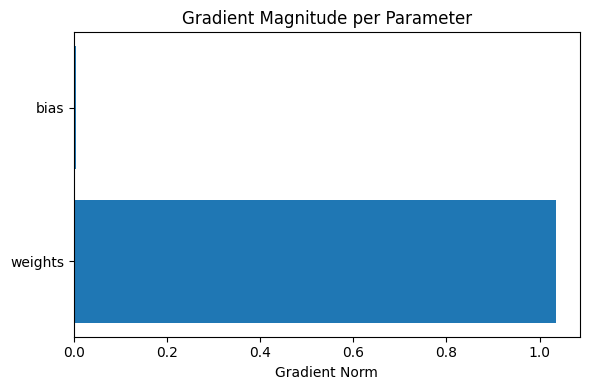

Epoch 1, Loss: 3.7635, Accuracy: 0.5432


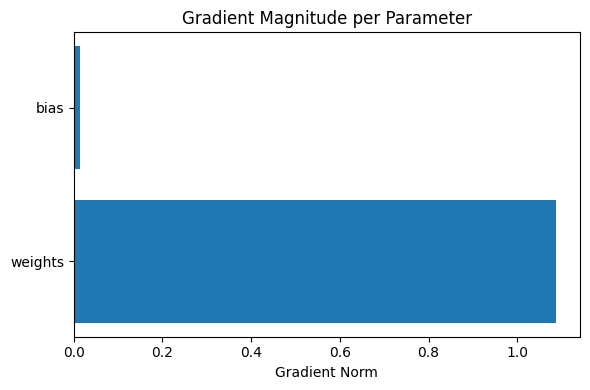

Epoch 2, Loss: 3.5982, Accuracy: 0.5432


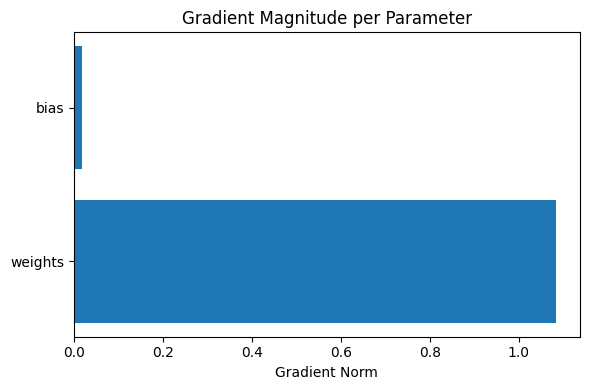

Epoch 3, Loss: 3.4213, Accuracy: 0.5438


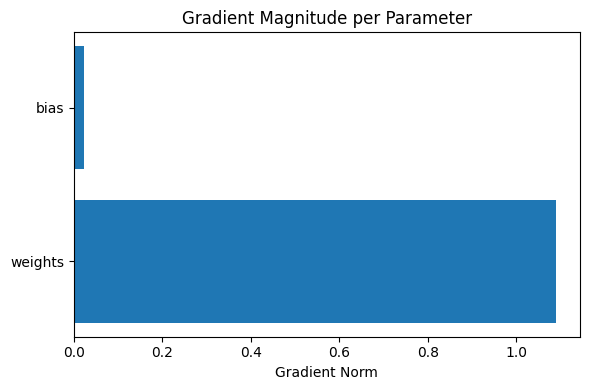

Epoch 4, Loss: 3.2449, Accuracy: 0.5462


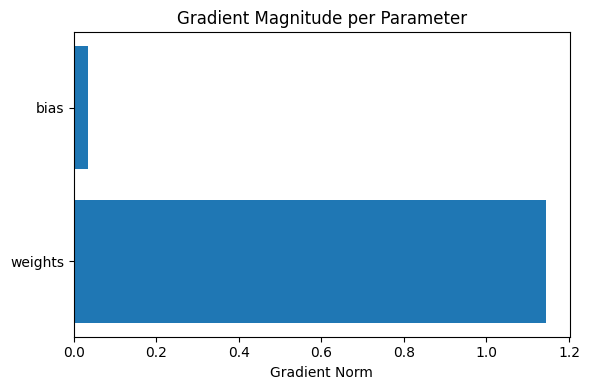

Epoch 5, Loss: 3.0598, Accuracy: 0.5480


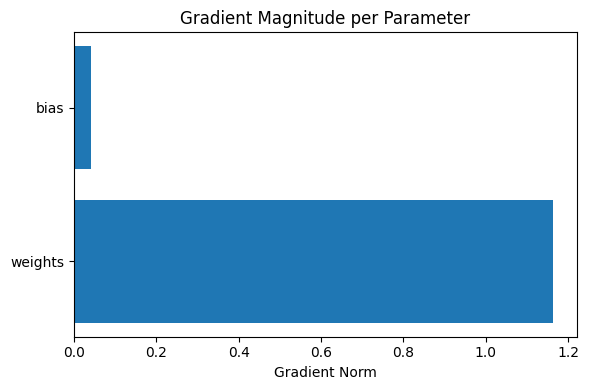

Epoch 6, Loss: 2.8607, Accuracy: 0.5492


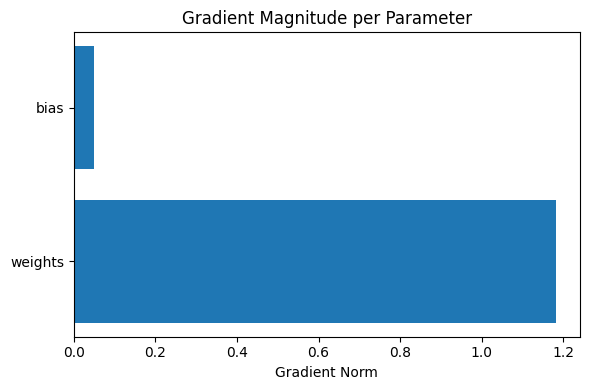

Epoch 7, Loss: 2.6545, Accuracy: 0.5516


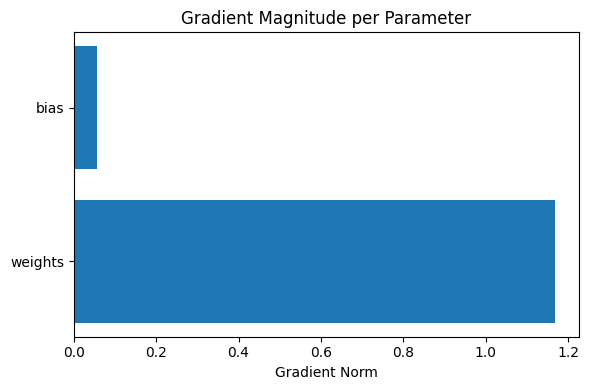

Epoch 8, Loss: 2.4463, Accuracy: 0.5540


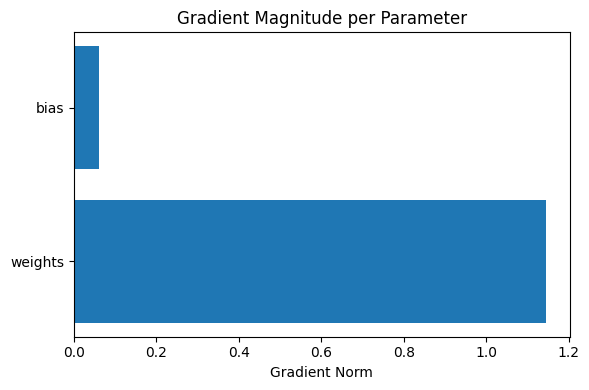

Epoch 9, Loss: 2.2428, Accuracy: 0.5571


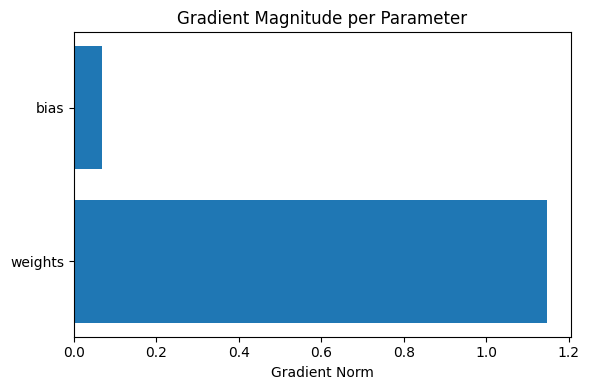

Epoch 10, Loss: 2.0469, Accuracy: 0.5625


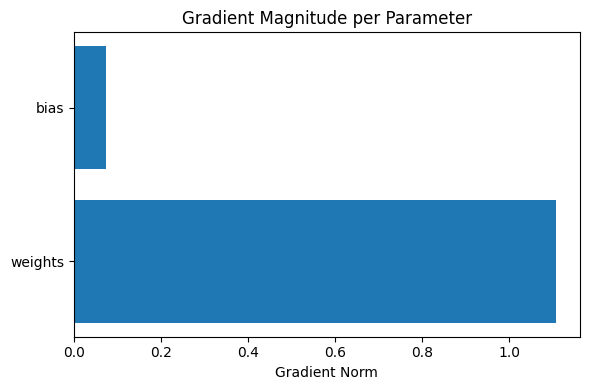

Epoch 11, Loss: 1.8514, Accuracy: 0.5661


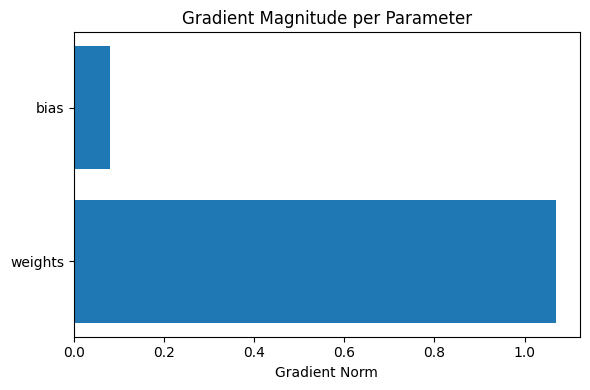

Epoch 12, Loss: 1.6693, Accuracy: 0.5703


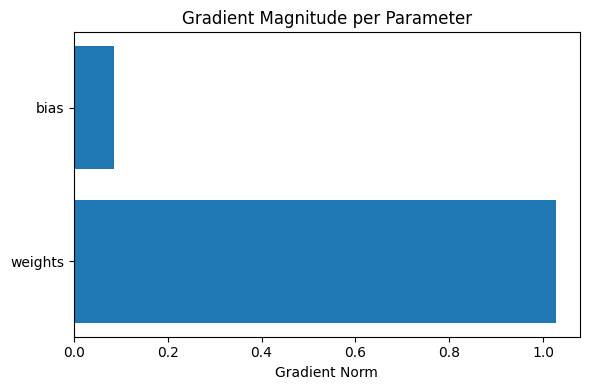

Epoch 13, Loss: 1.4985, Accuracy: 0.5740


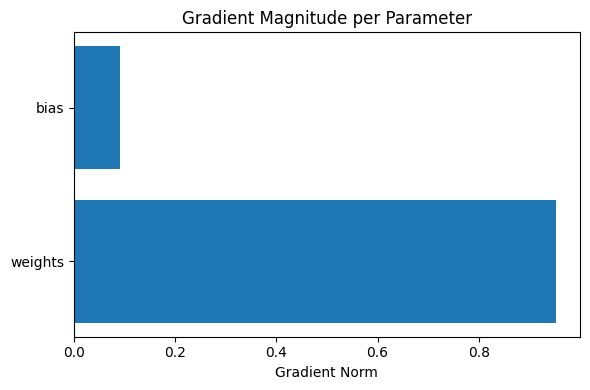

Epoch 14, Loss: 1.3432, Accuracy: 0.5836


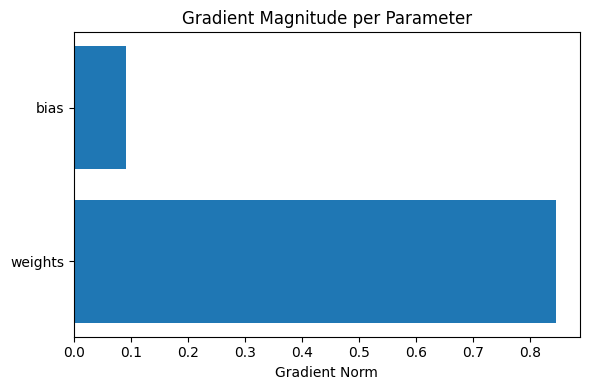

Epoch 15, Loss: 1.2134, Accuracy: 0.5915


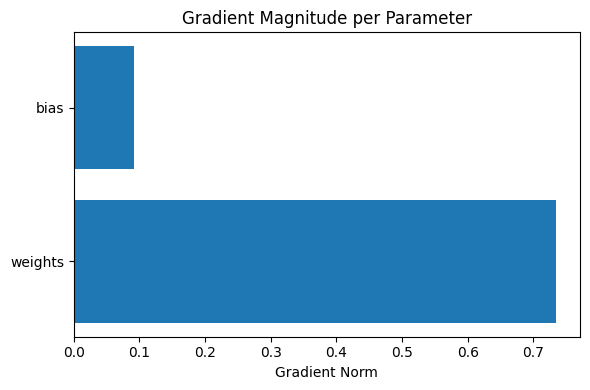

Epoch 16, Loss: 1.1120, Accuracy: 0.5999


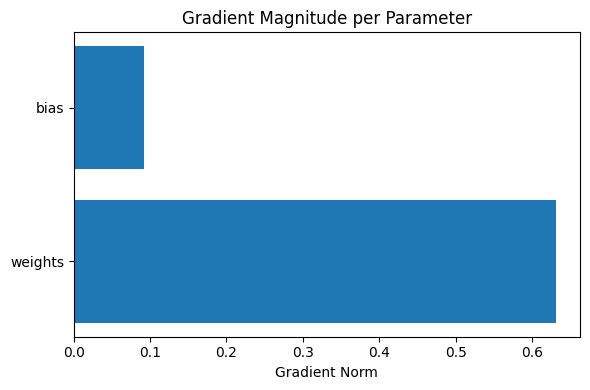

Epoch 17, Loss: 1.0357, Accuracy: 0.6066


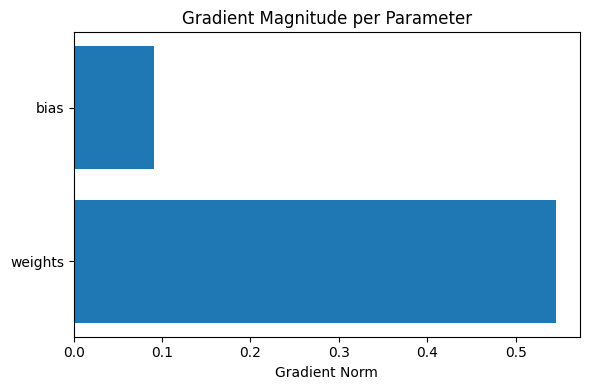

Epoch 18, Loss: 0.9788, Accuracy: 0.6108


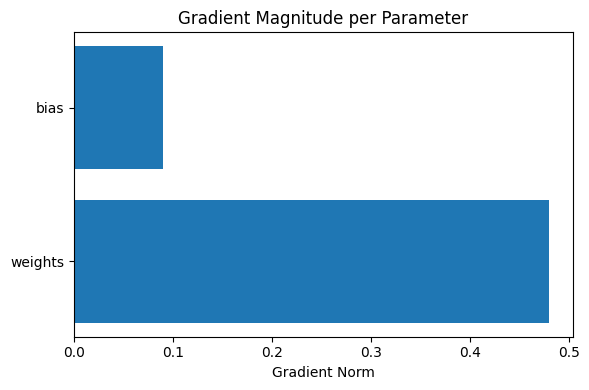

Epoch 19, Loss: 0.9358, Accuracy: 0.6138


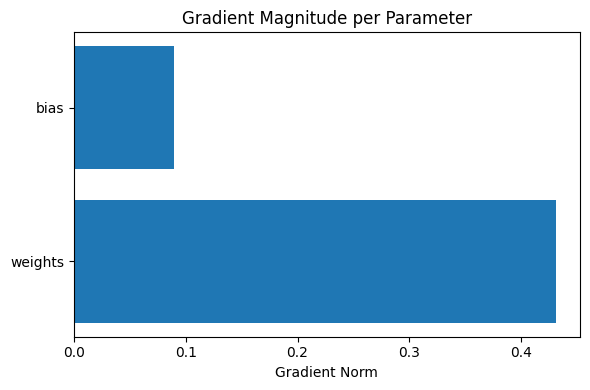

Epoch 20, Loss: 0.9019, Accuracy: 0.6180


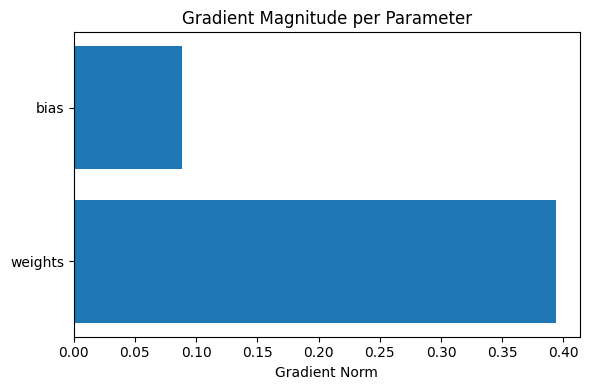

Epoch 21, Loss: 0.8741, Accuracy: 0.6217


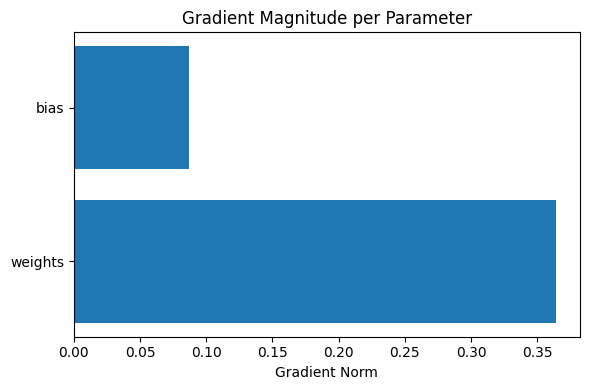

Epoch 22, Loss: 0.8506, Accuracy: 0.6241


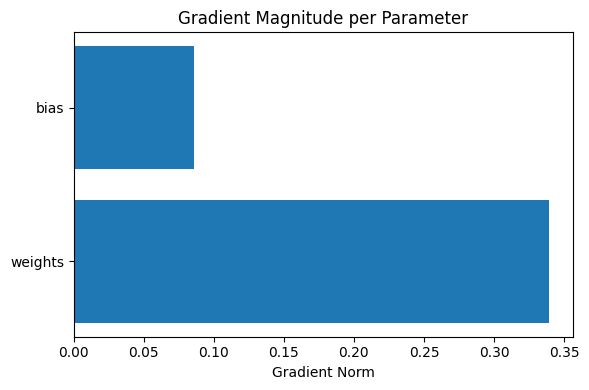

Epoch 23, Loss: 0.8303, Accuracy: 0.6259


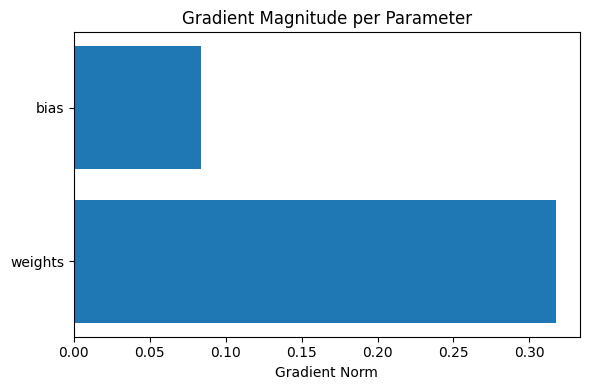

Epoch 24, Loss: 0.8125, Accuracy: 0.6289


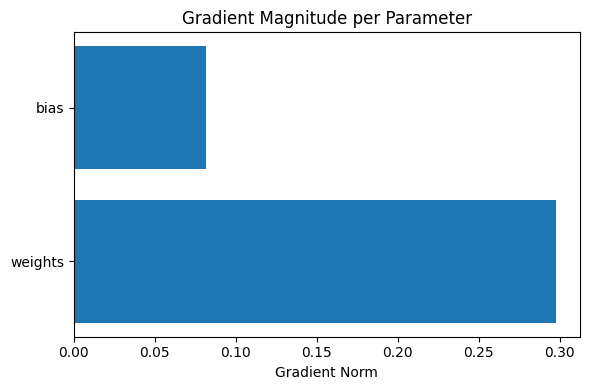

Epoch 25, Loss: 0.7968, Accuracy: 0.6319


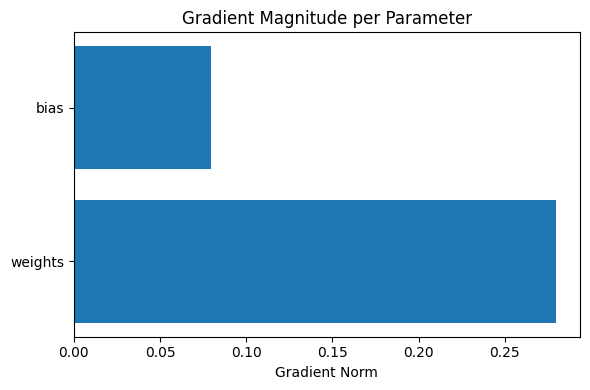

Epoch 26, Loss: 0.7829, Accuracy: 0.6319


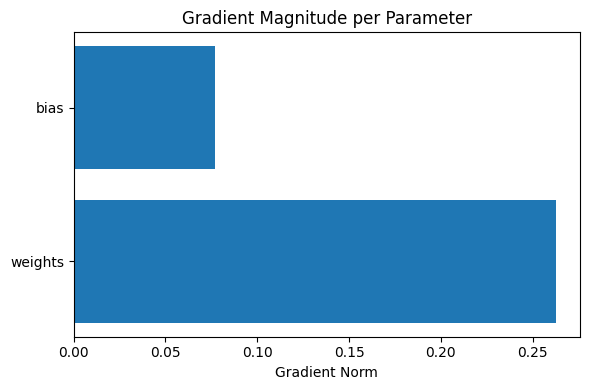

Epoch 27, Loss: 0.7706, Accuracy: 0.6337


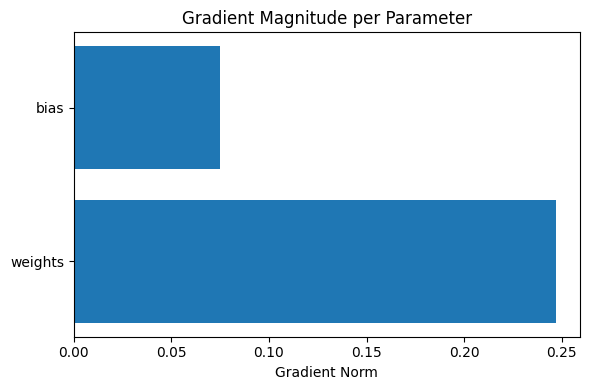

Epoch 28, Loss: 0.7597, Accuracy: 0.6337


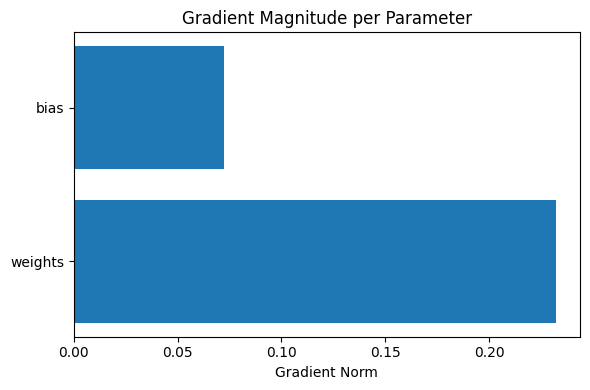

Epoch 29, Loss: 0.7500, Accuracy: 0.6356


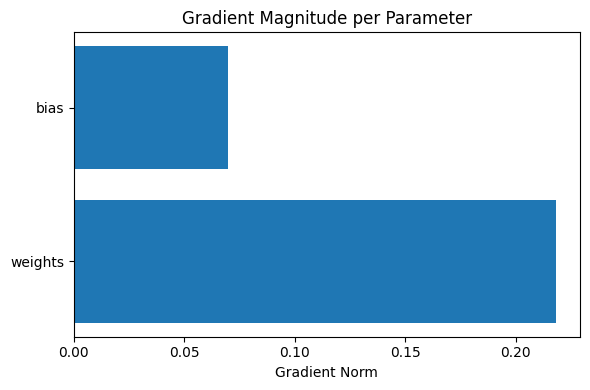

Epoch 30, Loss: 0.7414, Accuracy: 0.6356


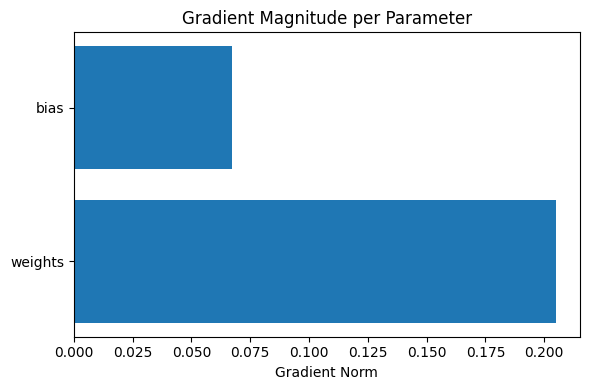

Epoch 31, Loss: 0.7337, Accuracy: 0.6362


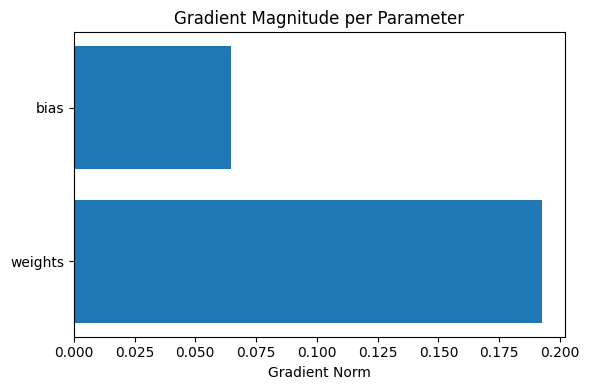

Epoch 32, Loss: 0.7270, Accuracy: 0.6362


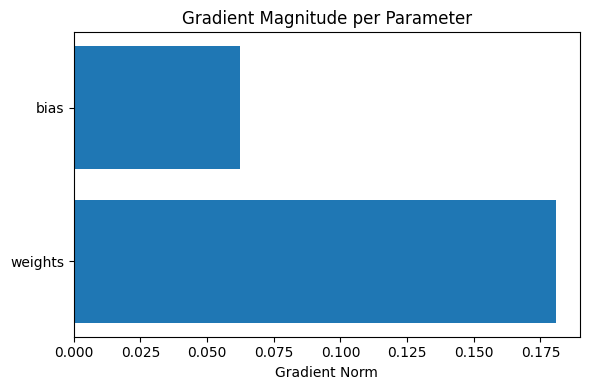

Epoch 33, Loss: 0.7210, Accuracy: 0.6368


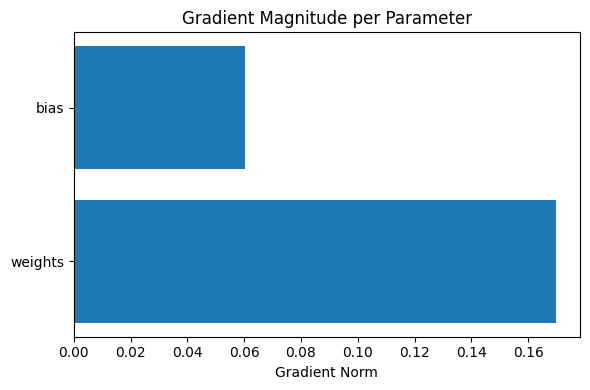

Epoch 34, Loss: 0.7156, Accuracy: 0.6368


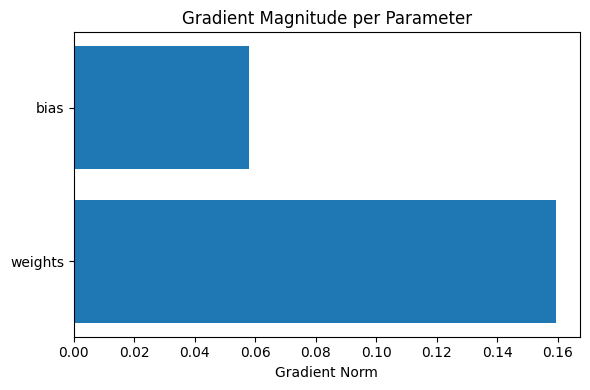

Epoch 35, Loss: 0.7109, Accuracy: 0.6368


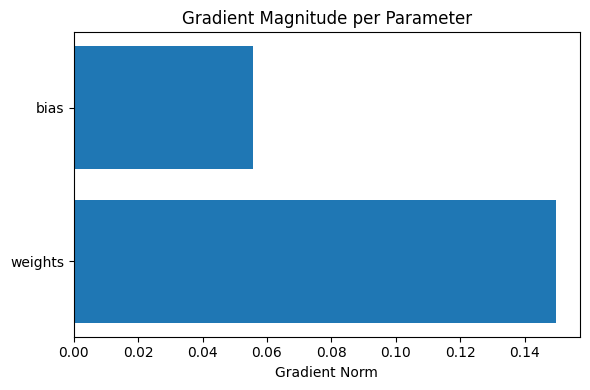

Epoch 36, Loss: 0.7067, Accuracy: 0.6368


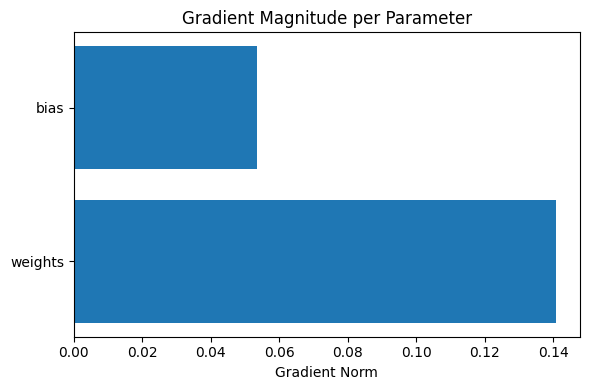

Epoch 37, Loss: 0.7030, Accuracy: 0.6368


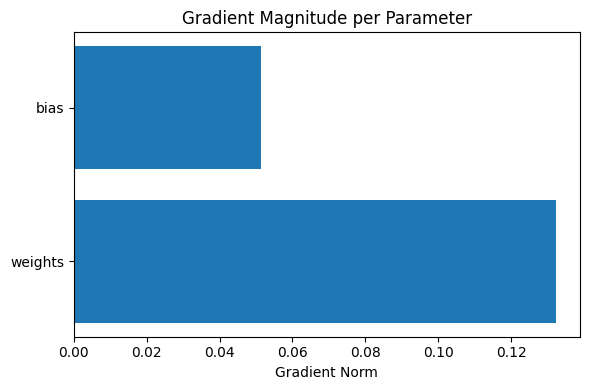

Epoch 38, Loss: 0.6997, Accuracy: 0.6368


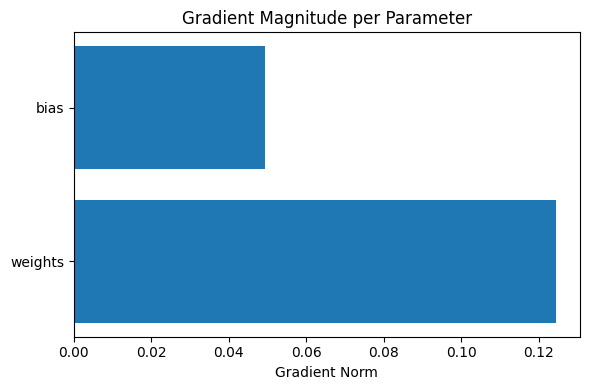

Epoch 39, Loss: 0.6968, Accuracy: 0.6368


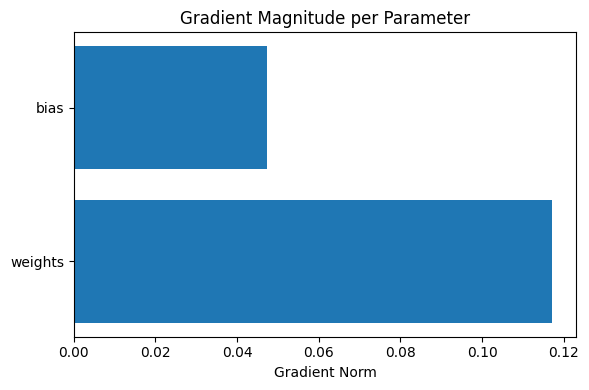

Epoch 40, Loss: 0.6942, Accuracy: 0.6368


In [104]:
learning_rate = 0.15
epochs = 40

# Initialize model
model = MySimpleNN(X_train_tensor.shape[1])

# Store loss and accuracy
losses = []
accuracies = []

# Training loop
for epoch in range(epochs):
    y_pred = model.forward(X_train_tensor)
    loss = model.loss_function(y_pred, y_train_tensor)
    loss.backward()

    # Accuracy calculation
    with torch.no_grad():
        predictions = (y_pred > 0.9).float()
        accuracy = (predictions == y_train_tensor).float().mean().item()

    losses.append(loss.item())
    accuracies.append(accuracy)

    # Gradient plot
    plot_gradients(model)

    # Parameter update
    with torch.no_grad():
        model.weights -= learning_rate * model.weights.grad
        model.bias -= learning_rate * model.bias.grad

    model.weights.grad.zero_()
    model.bias.grad.zero_()

    print(f'Epoch {epoch + 1}, Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}')


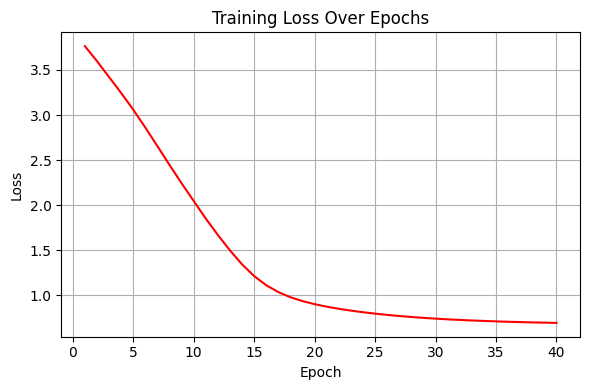

In [105]:
# plot for loss

plt.figure(figsize=(6, 4))
plt.plot(range(1, epochs + 1), losses, color='red')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.grid(True)
plt.tight_layout()
plt.show()


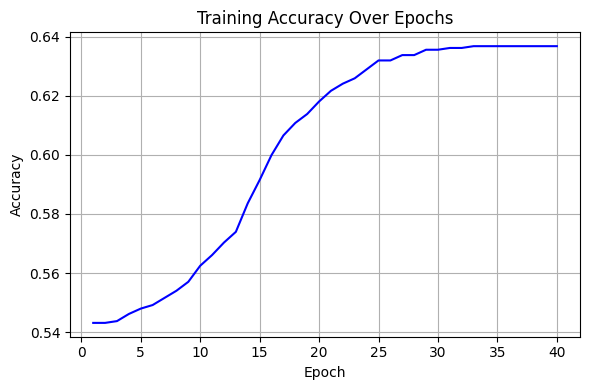

In [106]:
# plot for accuracy
plt.figure(figsize=(6, 4))
plt.plot(range(1, epochs + 1), accuracies, color='blue')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training Accuracy Over Epochs")
plt.grid(True)
plt.tight_layout()
plt.show()


In [107]:
# Model evaluation
with torch.no_grad():
    y_pred = model.forward(X_test_tensor)
    y_pred = (y_pred > 0.9).float()
    accuracy = (y_pred == y_test_tensor).float().mean()
    print(f'Accuracy: {accuracy.item()}')


Accuracy: 0.5861803889274597


In [108]:
model.bias

Parameter containing:
tensor([-0.3934], dtype=torch.float64, requires_grad=True)